**Membuat Multi-Line Chart**

Bagian paling menegangkan dari hari ini berhasil kulewati. Presentasiku berjalan lancar dan Senja masih saja membahasnya.

“Kerja bagus, Aksara. Dari grafik ini cabang C jadi bisa lihat GMV mereka di bulan Oktober 2019 yang meningkat drastis." 

Aku tersenyum lebar. Apalagi yang paling membahagiakan selain tahu hasil kerja bisa bermanfaat? Di tengah antara aku dan Senja, Andra ikut menimpali. "Agar hasilnya lebih lengkap lagi, bisa minta tolong gali lebih dalam, apa yang membuat GMV ini meningkat? Jadi kita bisa berikan data ini ke Business Development agar mereka bisa menentukan strategi bisnis kedepannya,” ujar Andra.

“Satu lagi, Untuk pekerjaan ini, kamu akan dibantu Senja karena perlu berkomunikasi langsung dengan kepala cabang.”

“Oke, Ndra. Aku breakdown datanya berdasarkan dimensi yah, misalnya berdasarkan brand atau province. Nanti akan terlihat bagian mana yang paling berperan dalam kenaikan GMV ini,” jawabku mantap sambil mulai menyusun kodenya.

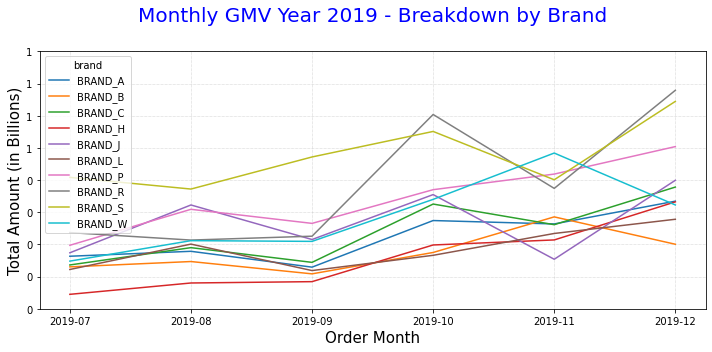

In [1]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

**Kustomisasi Legend**

“Kalau saya lihat, kita punya komponen baru ya di sini, namanya legend. Berhubung brand-nya ada banyak, dan default-nya di tengah makanya jadi menutupi grafiknya. Solusinya adalah kita pakai function khusus ya,” ujar Senja memberi masukan terhadap hasil kerjaku. Senangnya
Senja masih bersedia membantuku lagi.

Atur komponen legend menggunakan function **plt.legend()** seperti yang ditunjukkan oleh potongan kode berikut ini:
```
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
```
Beberapa parameter yang bisa ditambahkan untuk legend:

- loc: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan:
    - 'upper left', 'upper right', 'lower left', 'lower right':legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)
    - 'upper center', 'lower center', 'center left', 'center right': legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)
    - 'center': legend diletakkan di tengah-tengah axes
    - 'best': matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik
- bbox_to_anchor: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.
- shadow: jika diisi True, maka kotak legend akan memiliki bayangan.
- ncol: jumlah kolom dari isi legend, default-nya adalah 1
- fontsize: ukuran huruf pada legend
- title: memberikan judul pada legend
- title_fontsize: ukuran huruf pada judul legend

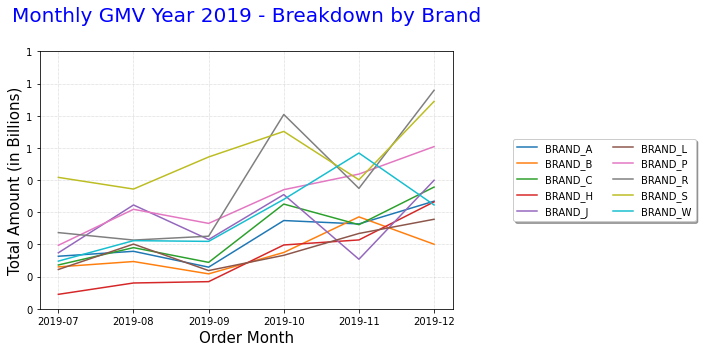

In [3]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

**Kustomisasi Colormap**

“Kalau sudah di breakdown by brand seperti ini terlihat ya trend sepanjang Oktober-Desember 2019 ini mirip semua. Jadi kemungkinan tidak ada faktor dari brand yang membuat GMV kita naik. Aksara, coba perlihatkan data breakdown by province” perintah Senja sambil menunjuk layar laptopku.

Kalau tidak pernah dibimbing Senja sebelumnya, aku mungkin akan berpikir Senja tipe yang perfeksionis sekali. Tapi aku tahu ini sudah jadi kebiasaannya untuk lebih teliti. Caranya justru membuat hasil kerjaku lebih maksimal.

“Siap!” Aku pun segera mengganti brand menjadi province. Sekaligus buat legend-nya di bawah dengan judulnya dengan detail seperti ini:

<Figure size 432x288 with 0 Axes>

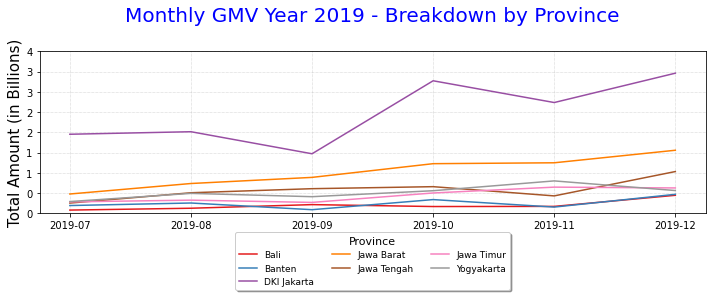

In [4]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province',fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Selain itu, perhatikan juga bahwa pada grafik tersebut, list warnanya berbeda, tidak default seperti pada brand. Itu karena di function plot() ditambahkan parameter cmap (yakni, color map) yang mendefinisikan sekelompok warna yang akan diberikan untuk tiap line. Di sini yang digunakan adalah ‘Set1’, yakni satu set warna yang biasa digunakan untuk warna yang diskrit. Untuk mengetahui jenis-jenis color map, bisa dilihat di halaman web berikut: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.

 

Dari grafik ini, terlihat ada beberapa provinsi yang mendominasi kenaikan GMV, seperti DKI Jakarta dan Jawa Barat. Tapi karena provinsinya banyak, yang bawah-bawah jadi kurang jelasnya. Bercampur semua begitu garisnya.

**Membuat Line Chart GMV Breakdown by Top Provinces**


“Oke, sudah terlihat cukup jelas jika kenaikan GMW disebabkan oleh provinsi. Berhubung kita fokusnya ke provinsi-provinsi yang GMV-nya besar, kalau begitu kita highlight untuk top 5 provinsi saja, yang lainnya kita gabungkan menjadi ‘other’,” ujar Senja menyimpulkan.
Aku berusaha membantu dengan segera mengecek lima provinsi dengan GMV tertinggi terlebih dulu:

```
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
print(top_provinces)
```
Setelah itu, membuat kolom baru, misalnya ‘province_top’. Seperti sebelumnya, manfaatkan function apply & lambda.

```
# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')
```
Kemudian, setelah memiliki kolom baru, grafiknya bisa di update. Sebagai catatan, untuk mengubah ukuran figure, juga bisa menggunakan function plt.gcf().set_size_inches yang diletakkan di akhir code, sebelum plt.show(). 
```
# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30,fontsize=20,color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()
```

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


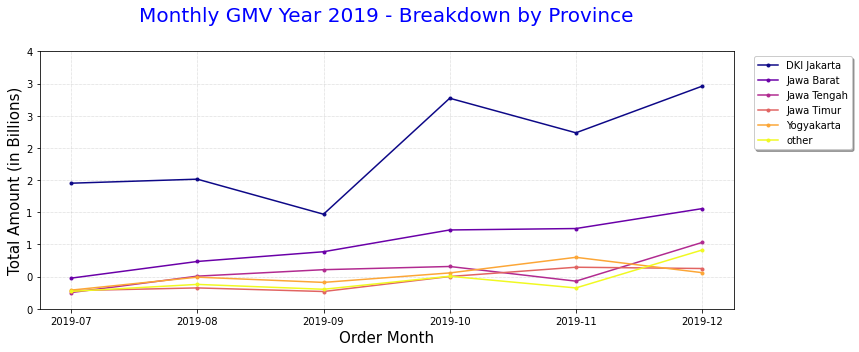

In [5]:
import datetime
import pandas as pd

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30,fontsize=20,color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

**Membuat Anotasi**

Setelah mengutak-atik anotasi, aku sedikit bingung. “Nja, ini gimana ya?” tanyaku akhirnya. Senja yang sedang duduk di sebelahku memperhatikan kodeku.

“Begini, Aksara. Anotasi itu mirip seperti teks, hanya saja ada suatu titik tertentu yang kita tunjuk untuk diberikan informasi tambahan. Selain itu, kita bisa menambahkan panah melalui anotasi,” jelas Senja sambil mengambil buku catatan dan menulis di sana.

 

Aku diam memperhatikan:

Untuk membuat annotate, gunakan function plt.annotate. Parameter pertama adalah isi teksnya, dan parameter kedua adalah koordinat dari point yang dianotasi.

Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:

- xytext: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)
- arrowprops:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:
    - arrowstyle: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.
    - connectionstyle: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.
    - color: menentukan warna dari panah
 

Berikut adalah kode yang digunakan untuk menganotasi multi-line chart dari 5 provinsi dengan GMV tertinggi:
```
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
			xytext=(4, 1700000000), weight='bold', color='red',
			arrowprops=dict(arrowstyle='fancy',
							connectionstyle='arc3',
							color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
			xytext=(0, 3700000000), weight='bold', color='red',
			arrowprops=dict(arrowstyle='->',
						   connectionstyle='angle',
						   color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()
```

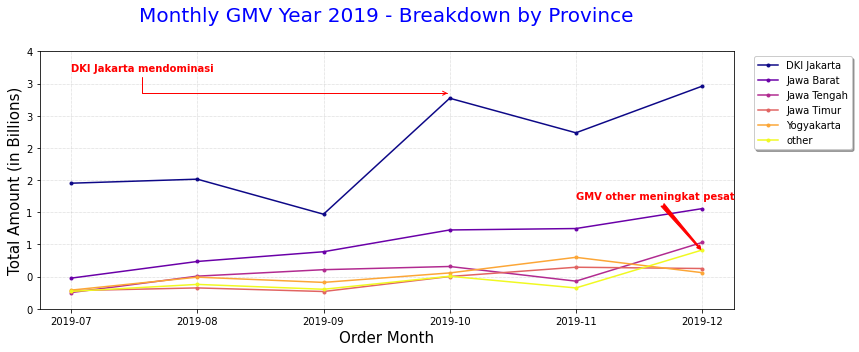

In [6]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
			xytext=(4, 1700000000), weight='bold', color='red',
			arrowprops=dict(arrowstyle='fancy',
							connectionstyle='arc3',
							color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
			xytext=(0, 3700000000), weight='bold', color='red',
			arrowprops=dict(arrowstyle='->',
						   connectionstyle='angle',
						   color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()